In [1]:
# Load Basic libraries to manipulate the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Load models and metrics for those models
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import mutual_info_regression

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# load data
count_data = pd.read_csv('../data/train/datacountstudents_train.csv')

In [4]:
count_data.columns

Index(['id', 'yC', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32'],
      dtype='object')

In [5]:
count_data.drop(['id'], axis=1, inplace=True)

In [6]:
count_data.describe()

,yC,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,1.216667,64.530643,49.414167,0.308333,0.150000,0.033333,0.125000,0.083333,15.478996,28.133333,...,0.228209,0.027142,6.450000,5.558333,78.822689,0.141667,0.041667,3.866667,0.300111,0.515788
std,1.258139,10.093439,40.977939,0.463741,0.358569,0.180258,0.332106,0.277544,1.913951,15.052253,...,0.335089,0.112337,0.877832,0.985575,49.591147,0.350170,0.200664,2.145675,0.195522,0.297028
min,0.000000,34.217000,4.600000,0.000000,0.000000,0.000000,0.000000,0.000000,10.617270,0.000000,...,0.000000,0.000000,5.000000,3.000000,11.087400,0.000000,0.000000,1.000000,0.020398,0.040737
25%,0.000000,57.452500,14.300000,0.000000,0.000000,0.000000,0.000000,0.000000,14.586870,27.750000,...,0.001525,0.000000,6.000000,5.000000,43.637425,0.000000,0.000000,2.000000,0.107324,0.213143
50%,1.000000,67.946500,37.900000,0.000000,0.000000,0.000000,0.000000,0.000000,15.421435,31.000000,...,0.019950,0.000100,6.000000,6.000000,66.143600,0.000000,0.000000,4.000000,0.262157,0.495616
75%,2.000000,71.690097,77.500000,1.000000,0.000000,0.000000,0.000000,0.000000,16.542645,40.250000,...,0.407775,0.001225,7.000000,6.000000,104.938750,0.000000,0.000000,6.000000,0.494643,0.808403
max,7.000000,78.836829,159.400000,1.000000,1.000000,1.000000,1.000000,1.000000,20.850060,45.000000,...,0.985000,0.746200,9.000000,7.000000,344.830000,1.000000,1.000000,7.000000,0.662330,0.996328


In [7]:
count_data.head(15)

,yC,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32
0,1,49.856000,118.8,1,0,0,0,0,16.32096,0,...,0.9709,0.0003,6,6,24.7138,0,0,7,0.056546,0.112860
1,0,71.836000,34.8,0,0,0,0,1,15.00535,44,...,0.4200,0.0000,8,4,38.0658,0,0,7,0.655260,0.886908
2,0,66.725000,41.8,0,1,0,0,0,17.07023,27,...,0.9650,0.0000,6,6,48.3807,0,1,4,0.067855,0.133944
3,2,71.351000,24.2,1,0,0,0,0,11.10790,31,...,0.0051,0.0000,5,7,175.9250,0,0,3,0.318584,0.627729
4,1,67.879000,42.3,0,0,0,0,1,15.07912,31,...,0.0022,0.0001,7,3,81.3357,0,0,5,0.219665,0.436101
5,1,76.994634,7.6,1,0,0,0,0,16.65255,45,...,0.0094,0.0082,6,6,31.9150,1,0,1,0.297416,0.558743
6,0,64.827000,75.9,0,0,0,0,0,15.78388,31,...,0.9000,0.0000,7,3,83.0969,0,0,5,0.185113,0.342531
7,2,70.705000,19.6,1,0,0,0,0,12.45424,31,...,0.0000,0.0000,6,6,110.1200,0,0,2,0.292938,0.583095
8,2,72.390000,19.6,1,0,0,0,0,13.11419,31,...,0.8635,0.0002,6,6,210.1610,0,0,6,0.244678,0.442987
9,1,71.383000,16.0,1,0,0,0,0,12.46987,31,...,0.0042,0.0004,6,6,100.8310,0,0,1,0.431135,0.850350


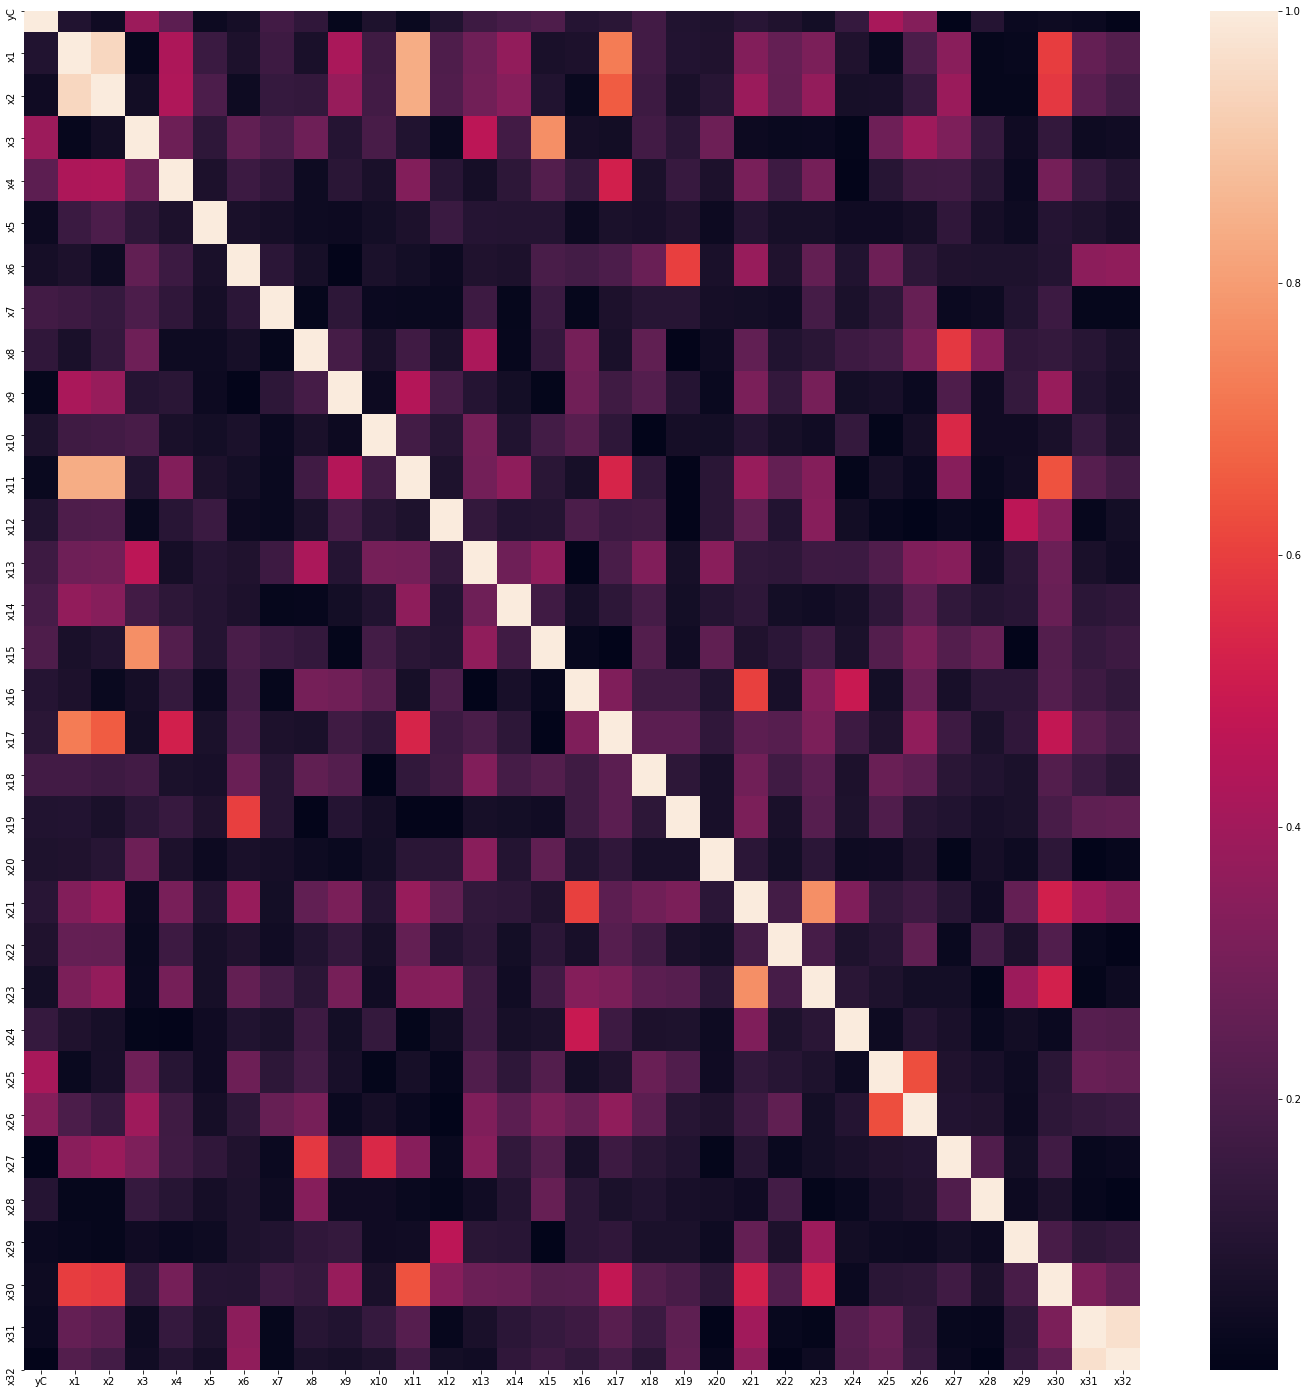

In [8]:
corr_data = count_data.corr().abs()

fig, ax = plt.subplots()
fig.set_size_inches(25,25)
sns.heatmap(corr_data)

In [9]:
data = count_data.drop(['yC'], axis=1)
target = count_data['yC']

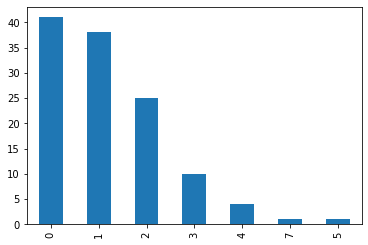

In [10]:
target.value_counts().plot(kind='bar')

In [11]:
numerical_features = ['x1', 'x2', 'x8', 'x10', 'x11','x12','x21','x22','x23','x24','x27','x31','x32']

In [12]:
categorical_features = ['x3','x4','x5','x6','x7','x13','x14',
                        'x15','x16','x17','x18','x19','x20','x28','x29']

In [13]:
count_features = [i for i in data.columns if i not in numerical_features and i not in categorical_features]

In [14]:
si = SimpleImputer(strategy='median').fit(data[numerical_features + count_features])

In [15]:
data[numerical_features + count_features] = si.transform(data[numerical_features + count_features])

In [16]:
se = StandardScaler().fit(data[numerical_features])
mms = MinMaxScaler().fit(data[count_features])

In [17]:
data[numerical_features] = se.transform(data[numerical_features])
data[count_features] = mms.transform(data[count_features])

In [18]:
data.fillna(data.median())
target.fillna(target.median())

0      1
1      0
2      0
3      2
4      1
      ..
115    0
116    0
117    4
118    2
119    2
Name: yC, Length: 120, dtype: int64

In [19]:
is_discrete = [i in categorical_features for i in data.columns]

In [20]:
mutual_info = mutual_info_regression(data, target, discrete_features=is_discrete, random_state=42)

In [21]:
mutual_info_series = pd.Series(data=mutual_info,index=data.columns)

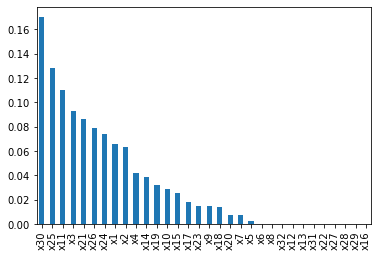

In [22]:
mutual_info_series.sort_values(ascending=False).plot.bar()

In [23]:
mutual_info_series.sort_values(ascending=False, inplace=True)

In [24]:
selected_features = mutual_info_series[mutual_info_series > 1e-2].index.to_numpy()

In [25]:
selected_features

array(['x30', 'x25', 'x11', 'x3', 'x21', 'x26', 'x24', 'x1', 'x2', 'x4',
       'x14', 'x19', 'x10', 'x15', 'x17', 'x23', 'x9', 'x18'],
      dtype=object)

In [26]:
current_features = []
current_mse = 0
previous_mse = 1e6 # randomly chosen to always be higher the first run
best_mse = 1e6 # randomly chosen to always be higher the first run
features_to_use = []

count_pipeline = Pipeline([
    ('model', MLPRegressor()) #Placeholder in order to call the GridSearchCV on the pipeline
])


parameter_space = [{
    'model': [MLPRegressor()],
    'model__hidden_layer_sizes': [(3,), (3,5), (3,5,7), (3,5,7,9), (7,5,3), (5,3)]
},
{
    'model': [GradientBoostingRegressor()],
    'model__learning_rate': [0.1, 0.5, 1.5, 0.01, 5],
    'model__n_estimators': [100, 200, 500, 50]
}]


model = GridSearchCV(count_pipeline, parameter_space, cv=3, scoring='neg_mean_squared_error',
                          n_jobs=-1, refit='neg_mean_squared_error')

for x in selected_features:
    current_features.append(x)
    
    print("Previous error: {}".format(previous_mse))
    print("Current best: {}".format(best_mse))
    
    print("Currently training model with features: {}".format(current_features))
    
    model.fit(data[current_features].values, target)
    
    current_mse = mean_squared_error(target, model.predict(data[current_features]))
    
    print("Finished training model, score: {} \n\n".format(current_mse))
    
    if current_mse < previous_mse and current_mse <= best_mse:
        features_to_use.append(x)
        best_mse = current_mse
    previous_mse = current_mse

print("Selected features to run: {}".format(features_to_use))

Previous error: 1000000.0
Current best: 1000000.0
Currently training model with features: ['x30']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


Finished training model, score: 1.537565184072939 


Previous error: 1.537565184072939
Current best: 1.537565184072939
Currently training model with features: ['x30', 'x25']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


Finished training model, score: 1.0409610776447153 


Previous error: 1.0409610776447153
Current best: 1.0409610776447153
Currently training model with features: ['x30', 'x25', 'x11']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


Finished training model, score: 0.8948008653720805 


Previous error: 0.8948008653720805
Current best: 0.8948008653720805
Currently training model with features: ['x30', 'x25', 'x11', 'x3']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


Finished training model, score: 0.6212569761685021 


Previous error: 0.6212569761685021
Current best: 0.6212569761685021
Currently training model with features: ['x30', 'x25', 'x11', 'x3', 'x21']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


Finished training model, score: 0.8345500882323594 


Previous error: 0.8345500882323594
Current best: 0.6212569761685021
Currently training model with features: ['x30', 'x25', 'x11', 'x3', 'x21', 'x26']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


Finished training model, score: 0.81854740060851 


Previous error: 0.81854740060851
Current best: 0.6212569761685021
Currently training model with features: ['x30', 'x25', 'x11', 'x3', 'x21', 'x26', 'x24']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


Finished training model, score: 1.0138892348684883 


Previous error: 1.0138892348684883
Current best: 0.6212569761685021
Currently training model with features: ['x30', 'x25', 'x11', 'x3', 'x21', 'x26', 'x24', 'x1']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


Finished training model, score: 1.0109715725071486 


Previous error: 1.0109715725071486
Current best: 0.6212569761685021
Currently training model with features: ['x30', 'x25', 'x11', 'x3', 'x21', 'x26', 'x24', 'x1', 'x2']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


Finished training model, score: 1.0109611468711763 


Previous error: 1.0109611468711763
Current best: 0.6212569761685021
Currently training model with features: ['x30', 'x25', 'x11', 'x3', 'x21', 'x26', 'x24', 'x1', 'x2', 'x4']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Finished training model, score: 1.8898259538500664 


Previous error: 1.8898259538500664
Current best: 0.6212569761685021
Currently training model with features: ['x30', 'x25', 'x11', 'x3', 'x21', 'x26', 'x24', 'x1', 'x2', 'x4', 'x14']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Finished training model, score: 3.387098238683583 


Previous error: 3.387098238683583
Current best: 0.6212569761685021
Currently training model with features: ['x30', 'x25', 'x11', 'x3', 'x21', 'x26', 'x24', 'x1', 'x2', 'x4', 'x14', 'x19']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Finished training model, score: 1.8208527104636774 


Previous error: 1.8208527104636774
Current best: 0.6212569761685021
Currently training model with features: ['x30', 'x25', 'x11', 'x3', 'x21', 'x26', 'x24', 'x1', 'x2', 'x4', 'x14', 'x19', 'x10']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Finished training model, score: 1.667833731021688 


Previous error: 1.667833731021688
Current best: 0.6212569761685021
Currently training model with features: ['x30', 'x25', 'x11', 'x3', 'x21', 'x26', 'x24', 'x1', 'x2', 'x4', 'x14', 'x19', 'x10', 'x15']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


Finished training model, score: 1.0109611468711763 


Previous error: 1.0109611468711763
Current best: 0.6212569761685021
Currently training model with features: ['x30', 'x25', 'x11', 'x3', 'x21', 'x26', 'x24', 'x1', 'x2', 'x4', 'x14', 'x19', 'x10', 'x15', 'x17']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


Finished training model, score: 1.0109611468711763 


Previous error: 1.0109611468711763
Current best: 0.6212569761685021
Currently training model with features: ['x30', 'x25', 'x11', 'x3', 'x21', 'x26', 'x24', 'x1', 'x2', 'x4', 'x14', 'x19', 'x10', 'x15', 'x17', 'x23']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


Finished training model, score: 0.7213256468550481 


Previous error: 0.7213256468550481
Current best: 0.6212569761685021
Currently training model with features: ['x30', 'x25', 'x11', 'x3', 'x21', 'x26', 'x24', 'x1', 'x2', 'x4', 'x14', 'x19', 'x10', 'x15', 'x17', 'x23', 'x9']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


Finished training model, score: 0.7213256468550481 


Previous error: 0.7213256468550481
Current best: 0.6212569761685021
Currently training model with features: ['x30', 'x25', 'x11', 'x3', 'x21', 'x26', 'x24', 'x1', 'x2', 'x4', 'x14', 'x19', 'x10', 'x15', 'x17', 'x23', 'x9', 'x18']
Finished training model, score: 0.7213256468550481 


Selected features to run: ['x30', 'x25', 'x11', 'x3']


C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


In [27]:
model.fit(data[features_to_use + ['x18','x23']], target)

C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\mmeji\.conda\envs\ec1209\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('model',
                                        MLPRegressor(activation='relu',
                                                     alpha=0.0001,
                                                     batch_size='auto',
                                                     beta_1=0.9, beta_2=0.999,
                                                     early_stopping=False,
                                                     epsilon=1e-08,
                                                     hidden_layer_sizes=(100,),
                                                     learning_rate='constant',
                                                     learning_rate_init=0.001,
                                                     max_iter=200, momentum=0.9,
                                                     n_iter_no_change=10,
                            

In [28]:
print(mean_squared_error(target, model.predict(data[features_to_use + ['x18','x23']])))

0.5379447971274492


In [29]:
count_data_test = pd.read_csv('../data/test/datacountstudents_test.csv')

In [30]:
test_data = count_data_test.drop(['yC'], axis=1)
test_target = count_data_test['yC']

In [31]:
test_data[numerical_features + count_features] = si.transform(test_data[numerical_features + count_features])
test_data[numerical_features] = se.transform(test_data[numerical_features])
test_data[count_features] = mms.transform(test_data[count_features])
test_data.fillna(test_data.median())
test_target.fillna(test_target.median())

0     0
1     3
2     0
3     2
4     2
5     3
6     2
7     1
8     0
9     1
10    1
11    0
12    2
13    4
14    2
15    5
16    1
17    0
18    2
19    0
20    2
21    6
22    2
23    0
24    1
25    0
26    2
27    0
28    4
29    2
Name: yC, dtype: int64

In [32]:
print(mean_squared_error(test_target, model.predict(test_data[features_to_use + ['x18','x23']])))

2.1339326252964432


In [35]:
data_dict = {"real": test_target, "guess": model.predict(test_data[features_to_use + ['x18','x23']])}
results = pd.DataFrame(data_dict)

In [36]:
results.to_csv('../validation/conteo/miguel.csv')